In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [4]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [5]:
# Level1
labels = adata.obs['celltype.l1'].tolist()
types = np.unique(labels).tolist()
types

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

In [6]:
# Level2
labels_l2 = adata.obs['celltype.l2'].tolist()
types_l2 = np.unique(labels_l2).tolist()
types_l2

['CD14 Mono',
 'CD16 Mono',
 'CD4 Memory',
 'CD4 Naive',
 'CD56 bright NK',
 'CD8 Effector_1',
 'CD8 Effector_2',
 'CD8 Memory_1',
 'CD8 Memory_2',
 'CD8 Naive',
 'GMP',
 'HSC',
 'LMPP',
 'MAIT',
 'Memory B',
 'NK',
 'Naive B',
 'Plasmablast',
 'Prog_B 1',
 'Prog_B 2',
 'Prog_DC',
 'Prog_Mk',
 'Prog_RBC',
 'Treg',
 'cDC2',
 'gdT',
 'pDC']

## Read annotation result from SingleR (Level: Main)

In [9]:
pred_Hao_L1 = pd.read_csv('./result_Hao_ref/SingleR_pred_Stuart_ref_Hao_L1.csv', index_col=0)
pred_Hao_L1.head()

,scores.B,scores.CD4.T,scores.CD8.T,scores.DC,scores.Mono,scores.NK,scores.other,scores.other.T,labels,delta.next,pruned.labels
a_AAACCTGAGCTTATCG-1,0.471561,0.488010,0.483208,0.509753,0.425369,0.435630,0.468879,0.459391,DC,0.065420,DC
a_AAACCTGAGGTGGGTT-1,0.467841,0.516238,0.507488,0.441296,0.420771,0.470411,0.466347,0.504528,CD4 T,0.007819,CD4 T
a_AAACCTGAGTACATGA-1,0.469042,0.519925,0.512679,0.429176,0.404201,0.452446,0.444729,0.495029,CD4 T,0.007730,CD4 T
a_AAACCTGCAAACCTAC-1,0.490149,0.553160,0.543499,0.447831,0.425673,0.489909,0.493153,0.534723,CD4 T,0.012499,CD4 T
a_AAACCTGCAAGGTGTG-1,0.441752,0.418508,0.409714,0.542265,0.550396,0.401041,0.509247,0.405306,Mono,0.076153,Mono


In [8]:
pred_types_Hao_L1 = np.unique(pred_Hao_L1['labels']).tolist()
pred_types_Hao_L1

['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'other', 'other T']

In [9]:
# NA in pruned.labels
pred_Hao_L1['pruned.labels'].isna().sum()

433

## Confusion matrix: Not converted (5*8)

In [20]:
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_Hao_L1['labels']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
cm = cm.reindex(index=['B cell', 'T cell', 'Mono/DC', 'NK', 'Progenitor cells'])
cm

SingleR predicted,B,CD4 T,CD8 T,DC,Mono,NK,other,other T
True,,,,,,,,
B cell,3629,30,2,88,3,0,0,1
T cell,3,10622,2237,3,2,102,1,1931
Mono/DC,4,2,0,787,6933,0,2,1
NK,2,38,6,1,8,1288,1,66
Progenitor cells,205,272,4,1916,414,1,60,7


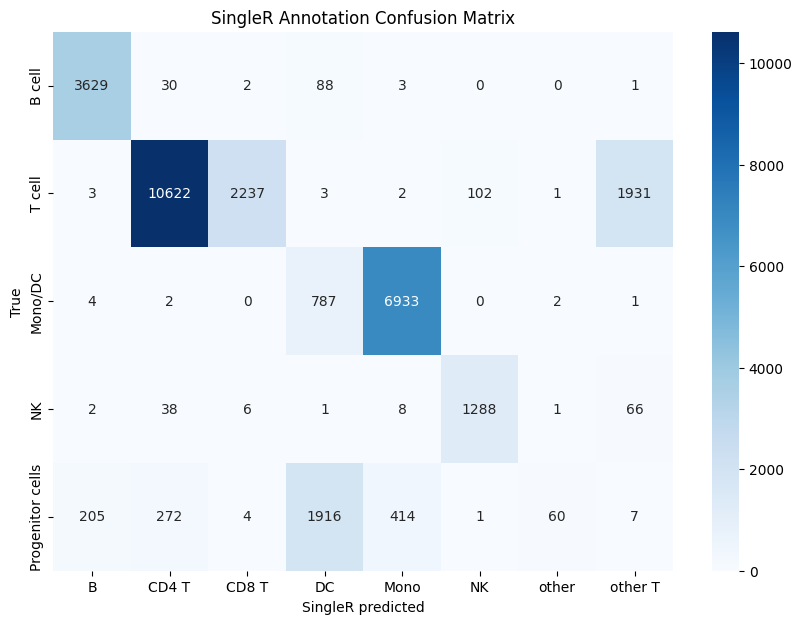

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

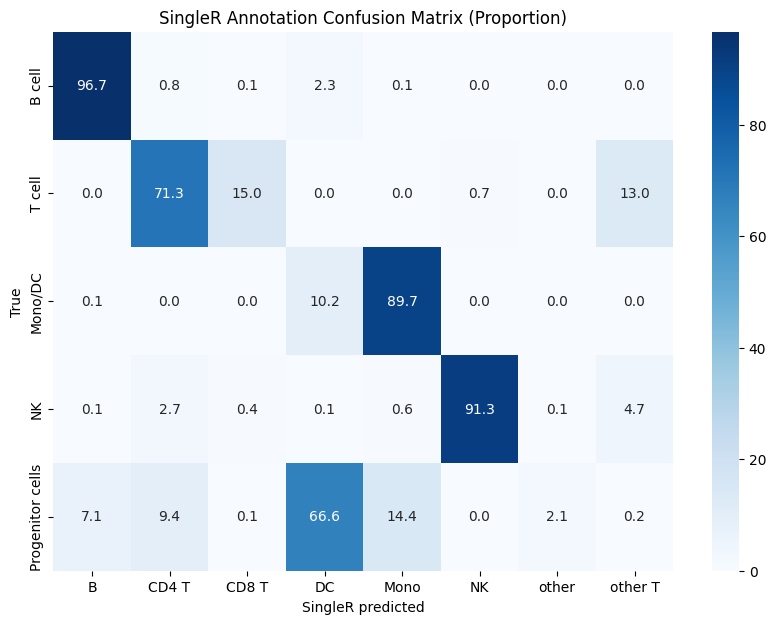

In [22]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()

## Confusion matrix: Mapped to Stuart (5*5)

In [10]:
a = ['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'other T']  # SingleR predicted using Hao as reference
b = ['B cell', 'T cell', 'T cell', 'Mono/DC', 'Mono/DC', 'NK', 'T cell']  # true labels from bmcite
type_reference = dict(zip(a, b))
type_reference

{'B': 'B cell',
 'CD4 T': 'T cell',
 'CD8 T': 'T cell',
 'DC': 'Mono/DC',
 'Mono': 'Mono/DC',
 'NK': 'NK',
 'other T': 'T cell'}

In [11]:
# pred_main['converted_labels'] = None
for cell in pred_Hao_L1.index:
    if pred_Hao_L1.loc[cell, 'labels'] in type_reference:
        pred_Hao_L1.loc[cell, 'converted_labels'] = type_reference[pred_Hao_L1.loc[cell, 'labels']]
    else:
        pred_Hao_L1.loc[cell, 'converted_labels'] = pred_Hao_L1.loc[cell, 'labels']
pred_Hao_L1.head()

,scores.B,scores.CD4.T,scores.CD8.T,scores.DC,scores.Mono,scores.NK,scores.other,scores.other.T,labels,delta.next,pruned.labels,converted_labels
a_AAACCTGAGCTTATCG-1,0.471561,0.488010,0.483208,0.509753,0.425369,0.435630,0.468879,0.459391,DC,0.065420,DC,Mono/DC
a_AAACCTGAGGTGGGTT-1,0.467841,0.516238,0.507488,0.441296,0.420771,0.470411,0.466347,0.504528,CD4 T,0.007819,CD4 T,T cell
a_AAACCTGAGTACATGA-1,0.469042,0.519925,0.512679,0.429176,0.404201,0.452446,0.444729,0.495029,CD4 T,0.007730,CD4 T,T cell
a_AAACCTGCAAACCTAC-1,0.490149,0.553160,0.543499,0.447831,0.425673,0.489909,0.493153,0.534723,CD4 T,0.012499,CD4 T,T cell
a_AAACCTGCAAGGTGTG-1,0.441752,0.418508,0.409714,0.542265,0.550396,0.401041,0.509247,0.405306,Mono,0.076153,Mono,Mono/DC


In [12]:
np.unique(pred_Hao_L1['converted_labels'])

array(['B cell', 'Mono/DC', 'NK', 'T cell', 'other'], dtype=object)

In [15]:
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_Hao_L1['converted_labels']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
cm = cm.reindex(index=['B cell', 'Mono/DC', 'NK', 'T cell', 'Progenitor cells'])
cm

SingleR predicted,B cell,Mono/DC,NK,T cell,other
True,,,,,
B cell,3629,91,0,33,0
Mono/DC,4,7720,0,3,2
NK,2,9,1288,110,1
T cell,3,5,102,14790,1
Progenitor cells,205,2330,1,283,60


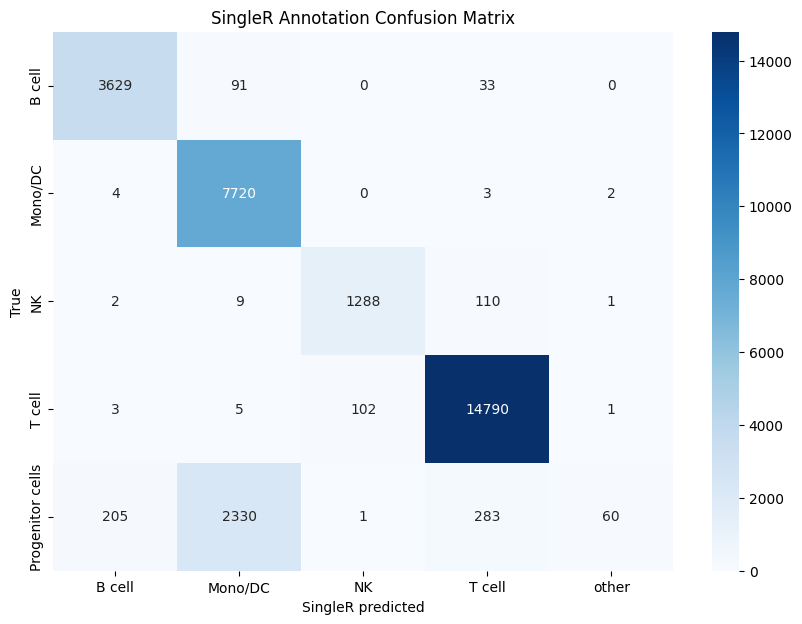

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.8942031820552947
micro Precision: 0.8942031820552947
micro F1 Score: 0.8942031820552947
macro Precision: 0.6003825138793792


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


macro F1 Score: 0.6200979482695729
weighted Precision: 0.8218010941951526
weighted F1 Score: 0.8538522615355529


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


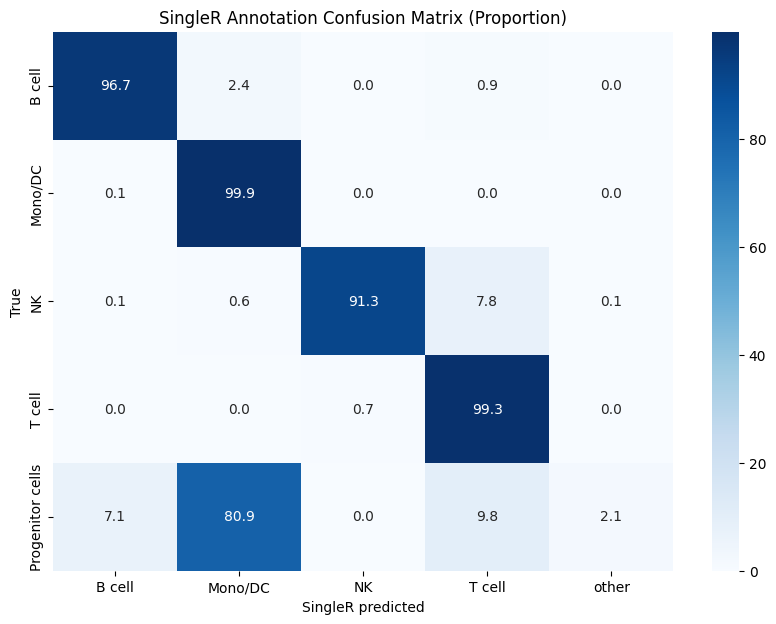

In [18]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()

## Confusion matrix: Mapped to Hao L1 (8*8)

In [25]:
# BMcite true L2 labels
bm_l2_to_converted_A = {
'Naive B': 'B',
'Memory B': 'B',
'CD4 Naive': 'CD4_T',
'CD4 Memory': 'CD4_T', # 'CD4_TEM', 'CD4_TCM',
'CD8 Naive': 'CD8_T',
'CD8 Effector_1': 'CD8_T',
'CD8 Effector_2': 'CD8_T',
'CD8 Memory_1': 'CD8_T',
'CD8 Memory_2': 'CD8_T',
'gdT': 'other_T',
'Treg': 'other_T',
'MAIT': 'other_T',
'cDC2': 'DC',
'pDC': 'DC',
'CD14 Mono': 'Mono',
'CD16 Mono': 'Mono',
'NK': 'NK',
'CD56 bright NK': 'NK',
'Plasmablast': 'other',
'HSC': 'other',  # (Hematopeitic stem and progenitor cell)
'GMP': 'other',  # (granulocyte macrophage progenitor)
'LMPP': 'other', # (Lympho-myeloid primed progenitor)
'Prog_RBC': 'other',
'Prog_B 1': 'other',
'Prog_B 2': 'other',
'Prog_DC': 'other',
'Prog_Mk': 'other'  # (megakaryocyte)
}

for cell in adata.obs_names:
    # Convert true L2 bmcite labels
    if adata.obs.loc[cell, 'celltype.l2'] in bm_l2_to_converted_A:
        adata.obs.loc[cell, 'true_L2_converted_A'] = bm_l2_to_converted_A[adata.obs.loc[cell, 'celltype.l2']]
    else:
        pass

adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight,true_L2_converted_A
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701,other
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789,other_T
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714,CD4_T
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308,CD4_T
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508,Mono


In [26]:
pred_Hao_L1.head()

,scores.B,scores.CD4.T,scores.CD8.T,scores.DC,scores.Mono,scores.NK,scores.other,scores.other.T,labels,delta.next,pruned.labels,converted_labels
a_AAACCTGAGCTTATCG-1,0.471561,0.488010,0.483208,0.509753,0.425369,0.435630,0.468879,0.459391,DC,0.065420,DC,Mono/DC
a_AAACCTGAGGTGGGTT-1,0.467841,0.516238,0.507488,0.441296,0.420771,0.470411,0.466347,0.504528,CD4 T,0.007819,CD4 T,T cell
a_AAACCTGAGTACATGA-1,0.469042,0.519925,0.512679,0.429176,0.404201,0.452446,0.444729,0.495029,CD4 T,0.007730,CD4 T,T cell
a_AAACCTGCAAACCTAC-1,0.490149,0.553160,0.543499,0.447831,0.425673,0.489909,0.493153,0.534723,CD4 T,0.012499,CD4 T,T cell
a_AAACCTGCAAGGTGTG-1,0.441752,0.418508,0.409714,0.542265,0.550396,0.401041,0.509247,0.405306,Mono,0.076153,Mono,Mono/DC


In [31]:
true_labels = adata.obs['true_L2_converted_A']  # True bmcite L2 labels mapped to Hao
predicted_labels = pred_Hao_L1['labels'].str.replace(' ', '_')

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
cm

SingleR predicted,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
True,,,,,,,,
B,3515,9,1,2,2,0,0,1
CD4_T,1,7808,10,1,0,0,1,39
CD8_T,2,2483,2226,2,2,97,0,1045
DC,0,1,0,736,73,0,0,0
Mono,4,1,0,51,6860,0,2,1
NK,2,38,6,1,8,1288,1,66
other,319,293,5,2002,415,1,60,7
other_T,0,331,1,0,0,5,0,847


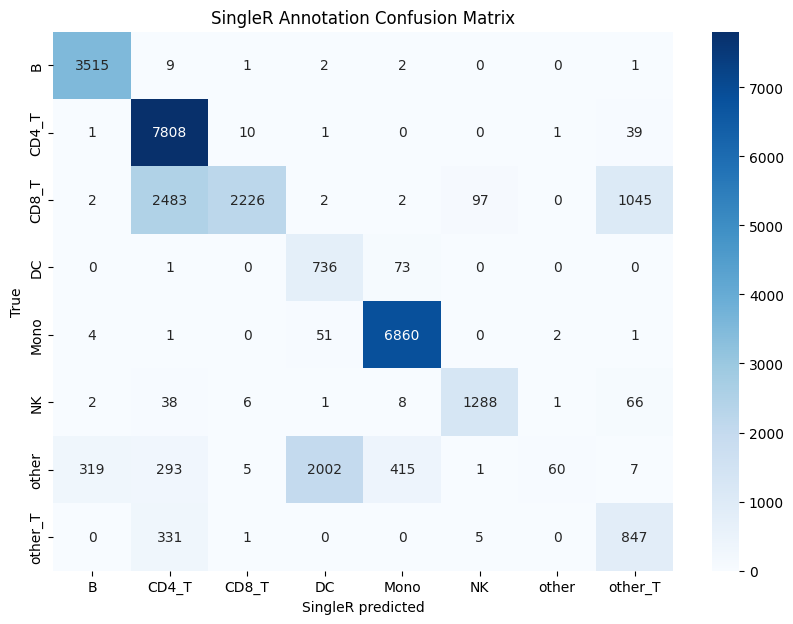

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.7609546165884195
micro Precision: 0.7609546165884195
micro F1 Score: 0.7609546165884195
macro Precision: 0.7622063170323436
macro F1 Score: 0.6487578860676694
weighted Precision: 0.8476526822838581
weighted F1 Score: 0.7213419489882089


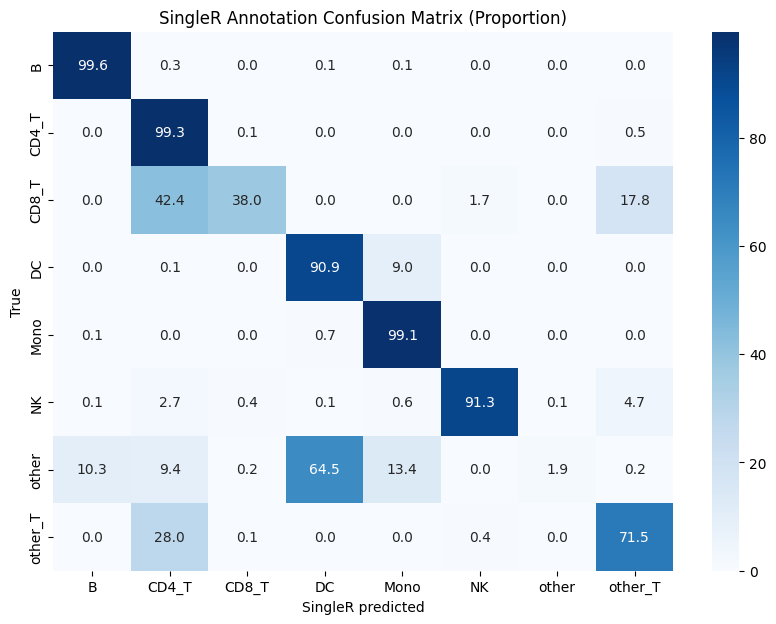

In [34]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()